# Iris Data Classification

In [1]:
# importing required librarires/APIs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
%matplotlib inline

## Loading and Viewing the dataset

In [2]:
# loading the iris dataset
iris_dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(iris_dataset_url, names=names)

In [3]:
data.head(15)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Information about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Checking the dimensions

In [5]:
print('Dimension of the data: ', data.shape)

Dimension of the data:  (150, 5)


### Statistical Analysis

In [6]:
print(data.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
# checking the count of each type of label
print(data.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Visualizing the dataset

### Univariate plots

### Box plot for each paramter

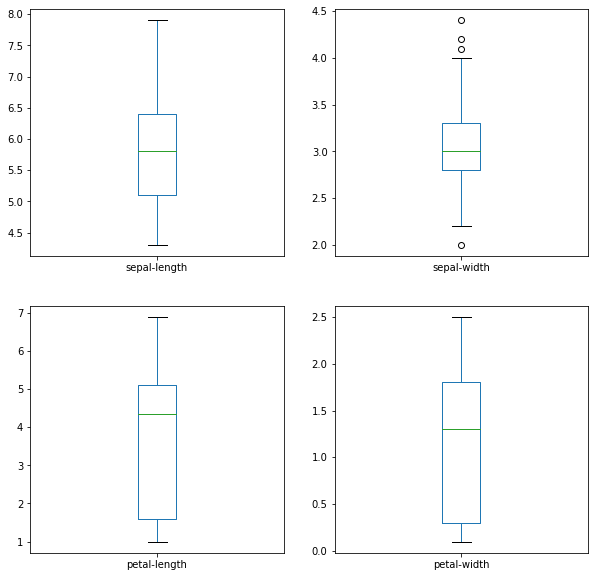

In [8]:
data.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(10,10))
plt.show()

### Histogram for each parameter

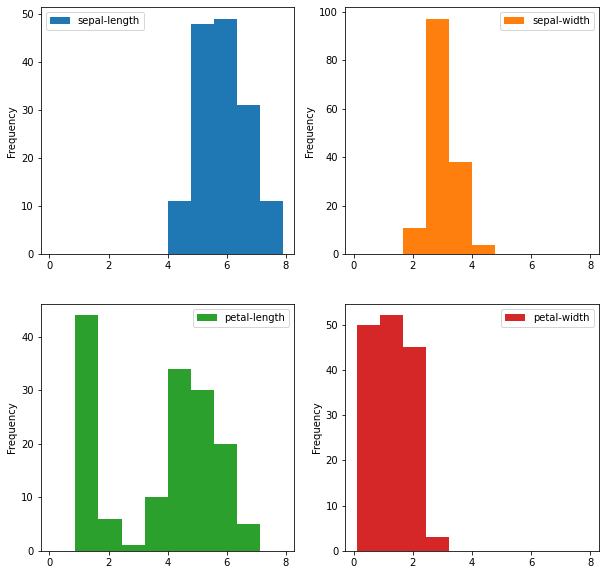

In [9]:
data.plot(kind='hist', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(10,10))
plt.show()

### Histogram comprising of all the paramters

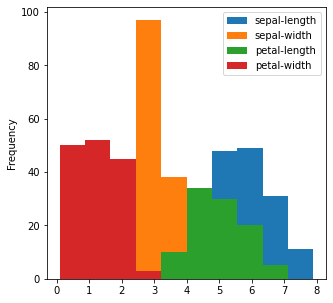

In [10]:
data.plot(kind='hist', figsize=(5,5))
plt.show()

### Scatter plots for each pair of paramters 

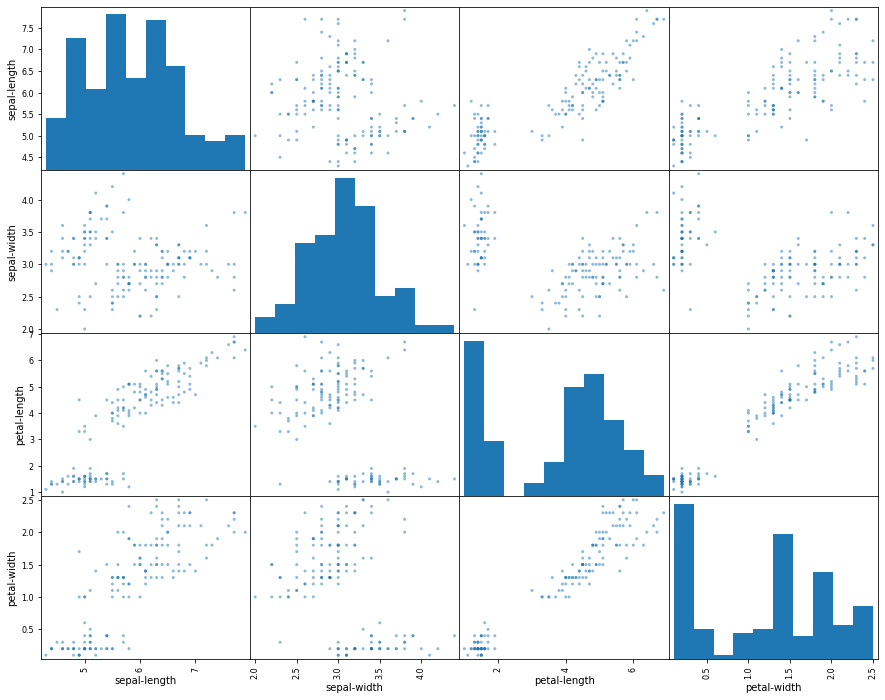

In [11]:
pd.plotting.scatter_matrix(data, figsize=(15, 12))
plt.show()

## Training the dataset

In [12]:
# Separating parameters and target variable
data_values = data.values
x = data_values[:, 0:4]
y = data_values[:, 4]

In [13]:
# Splitting the dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Using various models

In [14]:
models = []
models.append(('Linear Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K-Nearest Neighbours', KNeighborsClassifier()))
models.append(('Gaussian Navive Bayes', GaussianNB()))
models.append(('Support Vactor Machines', SVC(gamma='auto')))

### Validating each model

In [15]:
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(result)
    names.append(name)
    print(name.ljust(30), " => avg accuracy: ", result.mean(), ", std: ", result.std(), '\n')

Linear Regression               => avg accuracy:  0.9436363636363637 , std:  0.06149648918286458 

Linear Discriminant Analysis    => avg accuracy:  0.9709090909090909 , std:  0.04449904818371061 

K-Nearest Neighbours            => avg accuracy:  0.9609090909090909 , std:  0.06556178084401014 

Gaussian Navive Bayes           => avg accuracy:  0.9418181818181818 , std:  0.04762109401348653 

Support Vactor Machines         => avg accuracy:  0.9709090909090909 , std:  0.04449904818371061 



## Comparing the algorithms

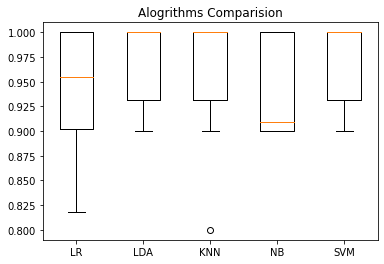

In [16]:
short_names = ["LR", "LDA", "KNN", "NB", "SVM"]
plt.boxplot(results, labels=short_names)
plt.title('Alogrithms Comparision')
plt.show()

## Training with SVM 

In [17]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

### Accuracy and predictions

In [18]:
print('Accuracy Score: ', accuracy_score(Y_test, predictions), '\n')
print('Confusion Matrix: \n', confusion_matrix(Y_test, predictions) ,'\n')
print('Classification Reoprt: \n', classification_report(Y_test, predictions))

Accuracy Score:  0.9777777777777777 

Confusion Matrix: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]] 

Classification Reoprt: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

